_Workshop 3, Advanced AI - Statistics Module_

**Name: Jaime Lopez Hernandez**

_Date: 17/08/2023_


### 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?


In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import yfinance as yf

# Getting price data and selecting adjusted price columns:
AMD=yf.download(tickers="AMD", start="2017-01-01",interval="1mo")
INTC=yf.download(tickers="INTC", start="2017-01-01",interval="1mo")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
AMD["R"] = (AMD["Adj Close"] / AMD["Adj Close"].shift(1)) - 1
print(AMD["R"])

INTC["R"] = (INTC["Adj Close"] / INTC["Adj Close"].shift(1)) - 1
print(INTC["R"])

Date
2017-01-01         NaN
2017-02-01    0.394407
2017-03-01    0.006224
2017-04-01   -0.085911
2017-05-01   -0.158647
                ...   
2023-04-01   -0.088154
2023-05-01    0.322703
2023-06-01   -0.036376
2023-07-01    0.004302
2023-08-01   -0.081775
Name: R, Length: 80, dtype: float64
Date
2017-01-01         NaN
2017-02-01   -0.016838
2017-03-01    0.003522
2017-04-01    0.002218
2017-05-01   -0.001106
                ...   
2023-04-01   -0.049281
2023-05-01    0.012234
2023-06-01    0.067969
2023-07-01    0.069677
2023-08-01   -0.080854
Name: R, Length: 80, dtype: float64


In [ ]:
AMD["r"] = np.log(AMD['Adj Close']).diff(1)
# I keep a new object with only returns:
AMD_R = AMD[['R','r']].copy()

INTC["r"] = np.log(INTC['Adj Close']).diff(1)
# I keep a new object with only returns:
INTC_R = INTC[['R','r']].copy()

In [ ]:
AMD_R= AMD_R.dropna()
INTC_R= INTC_R.dropna()

In [ ]:
# Stating the hypotheses:
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = AMD_R["r"].count()
amdvar = AMD_R["r"].var()
intelvar = INTC_R["r"].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (AMD_R["r"].mean() - INTC_R["r"].mean()) / sediff
t

1.3632480662050326

In [ ]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.17540740916929476

In [ ]:
# Using the ttest_ind function from stats:
st.ttest_ind(AMD_R['r'],INTC_R['r'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.3632480662050326, pvalue=0.17540740916929476)

### **4 Measures of linear relationship**

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%%**********************]  2 of 2 completed


<Figure size 640x480 with 0 Axes>

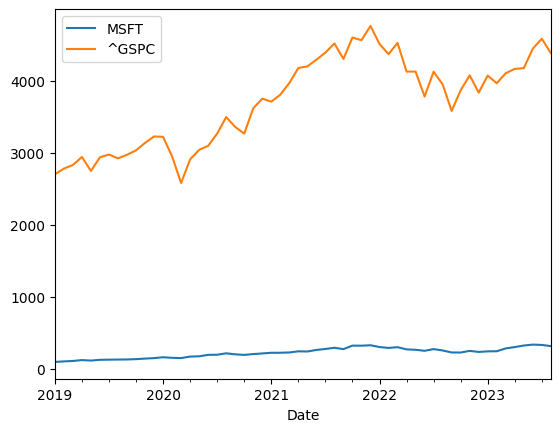

In [ ]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [ ]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 640x480 with 0 Axes>

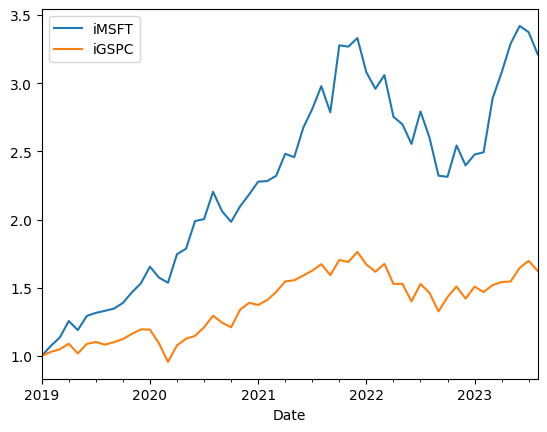

In [ ]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [ ]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [ ]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 640x480 with 0 Axes>

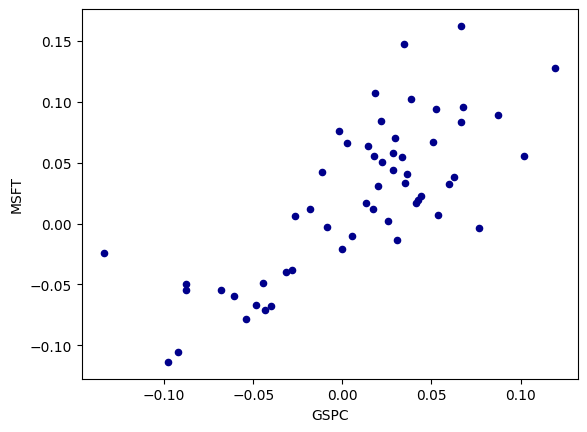

In [ ]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see?

IN THE SCATTER PLOT ABOVE I CAN OBSERVE THAT THERE IS NO CLEAR LINEAR RELATIONSHIP AMONG THE MSFT PRICES AND THE GSPC INDEX. PERHAPS THE DATA COULD BE DESCRIBED BY A NON-LINEAR RELATIONSHIP. EVEN THOUGH WE CAN DO A LINEAR REGRESSION THIS MIGHT NOT TRULY DESCRIBE THE PATTERN THAT LIES UNDERNEATH. 

<Figure size 640x480 with 0 Axes>

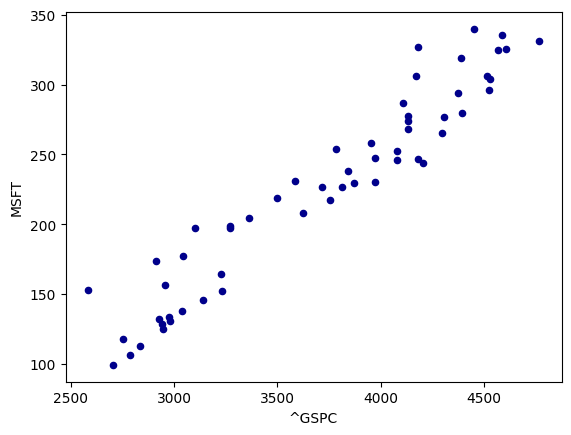

In [ ]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see? Which plot conveys a stronger linear relationship?

IN ORDER TO TRULY ASSESS WHICH HAS A LINEAR RELATIONSHIP, OTHER THAN DOING ADJUSTING THE DATA TO A LINE AND REVIEWING THE R SQUARED VALUE. WE COULD DO AN ANALYSIS OF THE MEANING OF EACH VALUE. THE STOCK PRICES ARE NON-STATIONARY, WHICH IN THIS CASE MEANS THAT IT CHANGES THROUGH TIME. ON THE OTHER HAND, WE HAVE THE STOCK RETURNS WHICH IS A STATIONARY VARIABLE. THIS HAS A SOMEWHAT SIMILAR AVERAGE AND SD THROUGH TIME. EVEN THROUGH VISUAL AID, AS THE SCATTER PLOT, THE STOCK RETURNS (THE SECOND GRAPH) DEMONSTRATES A STRONGER LINEAR RELATIONSHIP. SINCE THE DATA CLUSTERS IN A LINEAR FASHION. 

<Figure size 640x480 with 0 Axes>

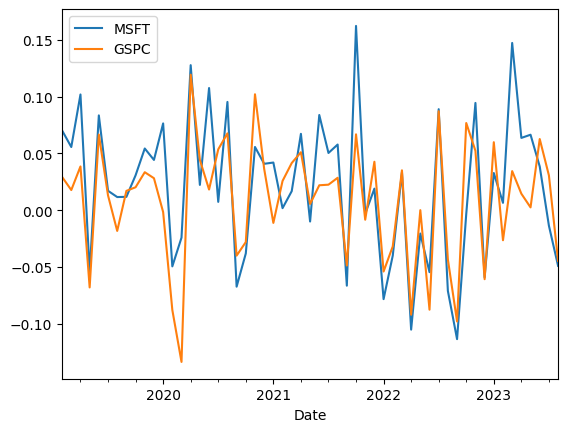

In [ ]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

### **4.1 Covariance**


## ***4.3 Calculating covariance and correlation***


In [ ]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()
cov = sum_of_prod / (N-1)
cov

0.0025951029727856226

In [ ]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00398242, 0.0025951 ],
       [0.0025951 , 0.00287731]])

In [ ]:
cov = covm[0,1]
cov

0.0025951029727856218

In [ ]:
#Correlation Matrix
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.76663289],
       [0.76663289, 1.        ]])

In [ ]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7666328914914056

In [ ]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7666328914914056, pvalue=8.916925695951519e-12)